## Statistical Modeling

##### Liberaries

In [1]:
# Import Liberaries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style="darkgrid") # set the background for the graphs
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts.data_processing import DataPreprocessing
from scripts.statistical_model import StatisticalModel

##### Data Preparation

In [3]:
#Reading the txt file MachineLearningRating_v3.txt
file_path = '../data/MachineLearningRating_v3.txt'
df=pd.read_csv(file_path, delimiter='|')

In [4]:
dp=DataPreprocessing(df)

In [5]:
handle_missing_data=dp.handle_missing_values(df)
handle_missing_data

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [6]:
new_df=dp.feature_engineering(handle_missing_data)
new_df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,VehicleAge,IsNewVehicle,ClaimsToPremiumRatio
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,22,1,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,22,1,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,22,1,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,22,1,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,22,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,11,1,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,11,1,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,11,1,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0,11,1,0.0


In [17]:
#  Select relevant features for insurance premium prediction
relevant_features = [
    'IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender',
    'VehicleType', 'RegistrationYear', 'make', 'Model','PostalCode','Province',
    'bodytype','SumInsured', 'CalculatedPremiumPerTerm',
    'CoverCategory', 'CoverType', 'CoverGroup',
    'ClaimsToPremiumRatio', 'VehicleAge', 'IsNewVehicle','TotalClaims','TotalPremium'
]
selected_features = [feature for feature in relevant_features if feature in new_df.columns]
selected_data = df[selected_features]

In [18]:
selected_data.head(5)

,IsVATRegistered,LegalType,MaritalStatus,Gender,VehicleType,RegistrationYear,make,Model,PostalCode,Province,...,SumInsured,CalculatedPremiumPerTerm,CoverCategory,CoverType,CoverGroup,ClaimsToPremiumRatio,VehicleAge,IsNewVehicle,TotalClaims,TotalPremium
0,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,21.929825
1,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,21.929825
2,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,0.01,25.0000,Windscreen,Windscreen,Comprehensive - Taxi,0.0,22,1,0.0,0.000000
3,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,0.0,22,1,0.0,512.848070
4,True,Close Corporation,Not specified,Not specified,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,1459,Gauteng,...,119300.00,584.6468,Own damage,Own Damage,Comprehensive - Taxi,0.0,22,1,0.0,0.000000


In [19]:
selected_data.select_dtypes(include=['object','bool']).columns

Index(['IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender',
       'VehicleType', 'make', 'Model', 'Province', 'bodytype', 'CoverCategory',
       'CoverType', 'CoverGroup'],
      dtype='object')

In [20]:
# Assume 'self.data' is your DataFrame and you want to use one-hot encoding on specific columns
columns_to_encode = ['IsVATRegistered', 'LegalType', 'MaritalStatus', 'Gender', 
                      'VehicleType', 'make', 'Model', 'bodytype', 'Province',
                      'CoverCategory', 'CoverType', 'CoverGroup']
encode_data=dp.encode_categorical_data(selected_data, method='label', columns=columns_to_encode)
encode_data

,IsVATRegistered,LegalType,MaritalStatus,Gender,VehicleType,RegistrationYear,make,Model,PostalCode,Province,...,SumInsured,CalculatedPremiumPerTerm,CoverCategory,CoverType,CoverGroup,ClaimsToPremiumRatio,VehicleAge,IsNewVehicle,TotalClaims,TotalPremium
0,1,0,1,2,4,2004,28,178,1459,2,...,0,25,26,21,5,0,22,1,0,21
1,1,0,1,2,4,2004,28,178,1459,2,...,0,25,26,21,5,0,22,1,0,21
2,1,0,1,2,4,2004,28,178,1459,2,...,0,25,26,21,5,0,22,1,0,0
3,1,0,1,2,4,2004,28,178,1459,2,...,119300,584,16,13,5,0,22,1,0,512
4,1,0,1,2,4,2004,28,178,1459,2,...,119300,584,16,13,5,0,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,0,1,2,1,4,2013,1,305,7493,8,...,500000,395,21,18,5,0,11,1,0,347
1000094,0,1,2,1,4,2013,1,305,7493,8,...,500000,395,21,18,5,0,11,1,0,347
1000095,0,1,2,1,4,2013,1,305,7493,8,...,500000,395,21,18,5,0,11,1,0,347
1000096,0,1,2,1,4,2013,1,305,7493,8,...,5000000,2,17,14,5,0,11,1,0,2


In [21]:
scaled_data=dp.scale_data(encode_data,method="standard")
scaled_data.head()

,IsVATRegistered,LegalType,MaritalStatus,Gender,VehicleType,RegistrationYear,make,Model,PostalCode,Province,...,SumInsured,CalculatedPremiumPerTerm,CoverCategory,CoverType,CoverGroup,ClaimsToPremiumRatio,VehicleAge,IsNewVehicle,TotalClaims,TotalPremium
0,14.074932,-2.0558,-0.038366,0.218146,0.232117,-1.908809,-0.991943,-1.145728,-0.589316,-0.810856,...,-0.400557,-0.231456,1.737016,1.608866,-0.034183,-0.007078,1.14285,0.0,-0.027206,-0.176150
1,14.074932,-2.0558,-0.038366,0.218146,0.232117,-1.908809,-0.991943,-1.145728,-0.589316,-0.810856,...,-0.400557,-0.231456,1.737016,1.608866,-0.034183,-0.007078,1.14285,0.0,-0.027206,-0.176150
2,14.074932,-2.0558,-0.038366,0.218146,0.232117,-1.908809,-0.991943,-1.145728,-0.589316,-0.810856,...,-0.400557,-0.231456,1.737016,1.608866,-0.034183,-0.007078,1.14285,0.0,-0.027206,-0.267360
3,14.074932,-2.0558,-0.038366,0.218146,0.232117,-1.908809,-0.991943,-1.145728,-0.589316,-0.810856,...,-0.321463,1.167161,0.280036,0.159461,-0.034183,-0.007078,1.14285,0.0,-0.027206,1.956437
4,14.074932,-2.0558,-0.038366,0.218146,0.232117,-1.908809,-0.991943,-1.145728,-0.589316,-0.810856,...,-0.321463,1.167161,0.280036,0.159461,-0.034183,-0.007078,1.14285,0.0,-0.027206,-0.267360


##### Model Building

In [22]:
stat_model=StatisticalModel(scaled_data)

In [23]:
# Split data into X and y
X=scaled_data.drop(['TotalPremium','TotalClaims'],axis=1)
y=scaled_data['TotalPremium']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = stat_model.split_data(X, y)

In [24]:
# Output the results
print("Training features:  ", X_train.shape)
print("Testing features: ", X_test.shape)
print("Training target: ", y_train.shape)
print("Testing target: ", y_test.shape)

Training features:   (800078, 19)
Testing features:  (200020, 19)
Training target:  (800078,)
Testing target:  (200020,)


In [27]:
# Train lenear regression model for each zipcode
models, predictions = stat_model.fit_model_per_zipcode(scaled_data)

Zipcode: -1.1395352067493718
Mean Squared Error: 0.6055
Zipcode: -1.1391578273375387
Mean Squared Error: 0.0111
Zipcode: -1.1384030685138726
Mean Squared Error: 0.0000
Zipcode: -1.1380256891020395
Mean Squared Error: 0.0616
Zipcode: -1.1376483096902064
Mean Squared Error: 0.1284
Zipcode: -1.1372709302783734
Mean Squared Error: 0.0000
Zipcode: -1.1368935508665403
Mean Squared Error: 0.0008
Zipcode: -1.1334971361600426
Mean Squared Error: 0.0000
Zipcode: -1.1319876185127102
Mean Squared Error: 7.7798
Zipcode: -1.131610239100877
Mean Squared Error: 0.0000
Zipcode: -1.1289685832180456
Mean Squared Error: 0.0000
Zipcode: -1.1282138243943796
Mean Squared Error: 0.0189
Zipcode: -1.126704306747047
Mean Squared Error: 0.0000
Zipcode: -1.125949547923381
Mean Squared Error: 0.8188
Zipcode: -1.1233078920405495
Mean Squared Error: 0.0000
Zipcode: -1.1225531332168832
Mean Squared Error: 0.0000
Zipcode: -1.121420994981384
Mean Squared Error: 0.0000
Zipcode: -1.1195340979222186
Mean Squared Error: 0.0

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [28]:
# Train machine learning models
lr_model, rfr_model, xgb_model = stat_model.train_models(X_train,y_train)

##### Model Evaluation

In [31]:
# Evaluate models
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for model in [lr_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = stat_model.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [32]:
# Create a DataFrame to display the results in table format
results_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R²': r2_scores
})

# Display the table
print(results_df)

               Model       MAE       MSE        R²
0  Linear Regression  0.252371  0.315979  0.392379
1      Random Forest  0.103870  0.133040  0.744168
2            XGBoost  0.178786  0.190529  0.633617


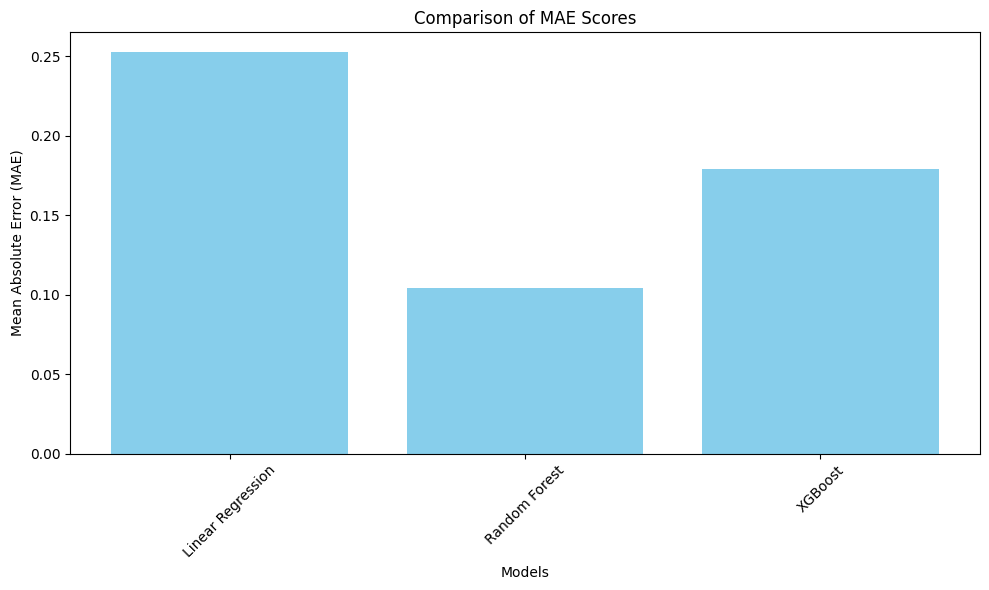

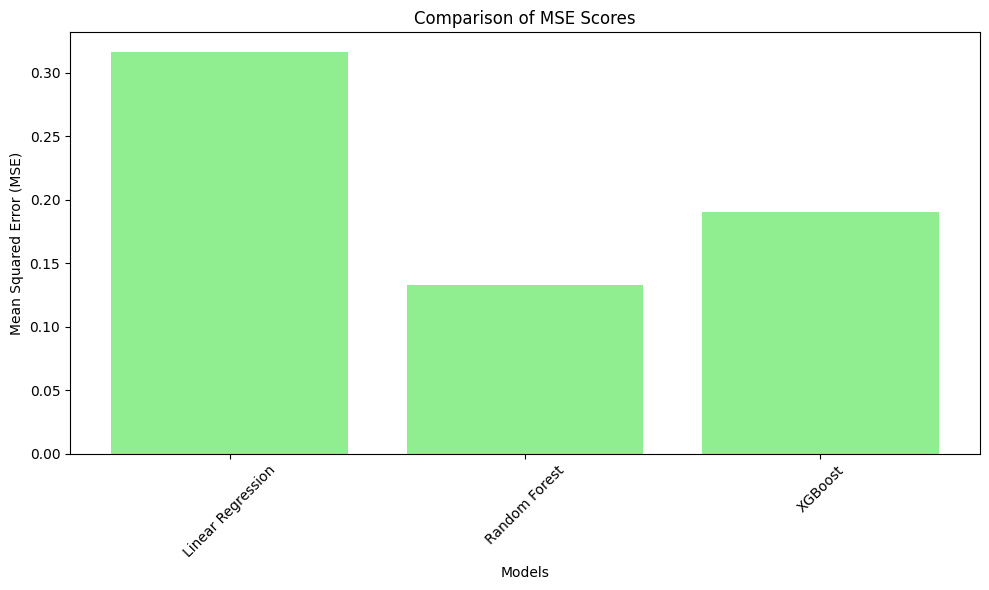

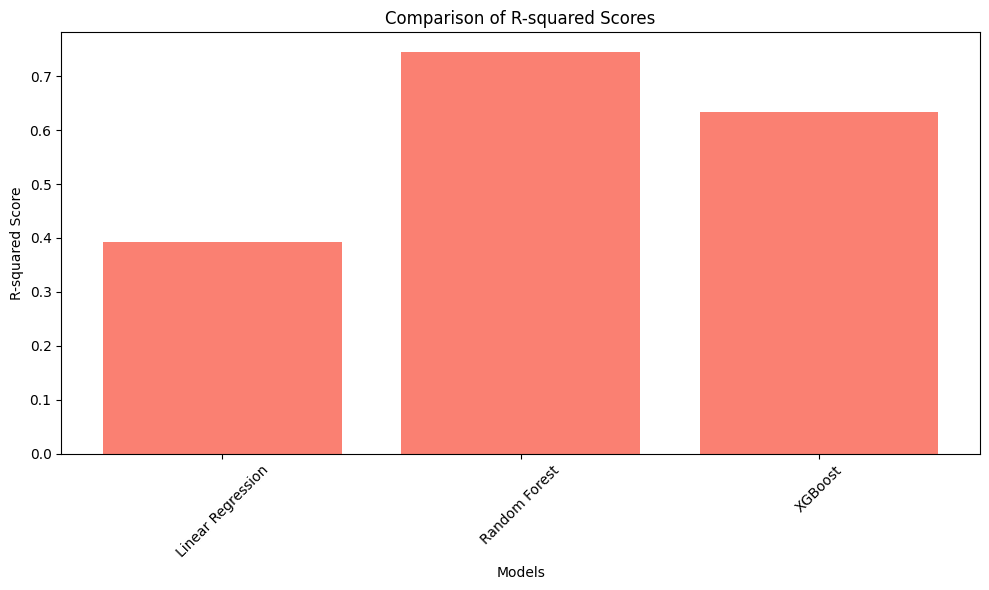

In [33]:
# Plot metrics
stat_model.plot_metrics(models, mae_scores, mse_scores, r2_scores)

##### Feature Importance Analysis

In [38]:
import shap
def analyze_feature_importance_shap(model, X_train):
      """
      Analyze feature importance using SHAP.

      Parameters:
      - model: The trained model to explain
      - X_train: Training features used to fit the model
      
      Returns:
      - shap_values: SHAP values for the features
      """
      # Create a SHAP explainer
      explainer = shap.Explainer(model, X_train)
      
      # Calculate SHAP values
      shap_values = explainer(X_train)
      
      # Summary plot
      shap.summary_plot(shap_values, X_train)
      
      return shap_values

In [ ]:
# use
shap_values = analyze_feature_importance_shap(rfr_model, X_train)

In [ ]:
# Feature importance for Random Forest
importances_rf = lr_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()